<a href="https://colab.research.google.com/github/RahulJuluru2/Unit1ClassPractice/blob/main/B19entropycalc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

In [ ]:
df = pd.read_csv('dat.csv')

In [ ]:
df.head()

,Taste,Temp,Texture,Like
0,salty,hot,soft,no
1,spicy,hot,soft,no
2,spicy,hot,hard,yes
3,spicy,cold,hard,no
4,spicy,hot,hard,yes


In [ ]:
e = entropy([6/10,4/10],base=2)
e

0.9709505944546688

In [ ]:
E_salt = (3/10)*entropy([1/3,2/3],base=2)
E_salt

0.27548875021634683

In [ ]:
E_sweet = (2/10)*entropy([2/2,0/2],base=2)
E_sweet

0.0

In [ ]:
E_spicy = (5/10)*entropy([3/5,2/5],base=2)
E_spicy

0.4854752972273344

In [ ]:
E_taste = E_salt+E_sweet+E_spicy
E_taste

0.7609640474436812

In [ ]:
IG_taste = 0.97 - 0.76
IG_taste

0.20999999999999996

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris = load_iris()

In [ ]:
df = pd.DataFrame(data = iris.data,columns=iris.feature_names)

In [ ]:
df['species'] = iris.target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.iloc[:,0:4]
y =df.iloc[:,4:]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42)

In [ ]:
dt = DecisionTreeClassifier(max_depth=3,criterion='entropy')

In [ ]:
dt.fit(x_train,y_train)  # here

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
dt.score(x_train,y_train)

0.9583333333333334

In [ ]:
from sklearn import tree

In [ ]:
text_present = tree.export_text(dt)
print(text_present)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: 2
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2



In [ ]:
text_present = tree.export_text(dt,feature_names=iris.feature_names)
print(text_present)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(x_test)

In [ ]:
print(accuracy_score(y_pred,y_test))

1.0


In [ ]:
print(dt.score(x_test,y_test))

1.0


In [ ]:
import graphviz

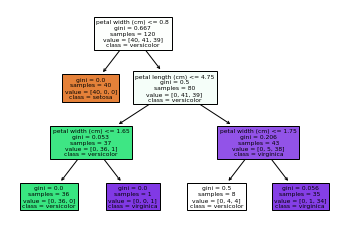

In [ ]:
datadisplay = tree.plot_tree(dt,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)